In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# List of years for the datasets
years = [2019, 2020, 2021, 2022, 2023]

# Load and concatenate the datasets
df_list = [pd.read_csv(f'finalData/NBA{year}.csv') for year in years]
nba_data = pd.concat(df_list, ignore_index=True)

nba_data['GameID'] = nba_data.apply(lambda row: f"{row['Date']}_{sorted([row['Team'], row['Opponent']])[0]}_{sorted([row['Team'], row['Opponent']])[1]}", axis=1)
                                    

# Finding the underdog and over/under value
over_under_values = {}
for game_id in nba_data['GameID'].unique():
    game_df = nba_data[nba_data['GameID'] == game_id]
    if game_df.shape[0] == 2:  # Ensure there are exactly two teams (two entries per game)
        underdog_entry = game_df.loc[game_df['ML'].idxmax()]  # The underdog has the maximum ML value if positive or least negative
        over_under_values[game_id] = underdog_entry['Close']

# Applying the over/under value from the underdog to both teams
nba_data['Adjusted_Close'] = nba_data['GameID'].map(over_under_values)

print(nba_data)

# Convert 'Close' to float, coercing errors to NaN
nba_data['Adjusted_Close'] = pd.to_numeric(nba_data['Adjusted_Close'], errors='coerce')

# If there are NaN values and you decide to drop them
nba_data.dropna(subset=['Adjusted_Close'], inplace=True)

nba_data['Total_Score'] = nba_data['Final'] + nba_data['PTS_opponent']
# #drop the missing values
nba_data.dropna(inplace=True)

#save all the column types to a list
column_types = nba_data.dtypes

#print(column_types)

#check for any missing values
missing_values = nba_data.isnull().sum()

#print(missing_values)

#total number of missing values
total_missing = missing_values.sum()

print(total_missing)



/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_86026/3054234990.py:8: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f'finalData/NBA{year}.csv') for year in years]
/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_86026/3054234990.py:8: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f'finalData/NBA{year}.csv') for year in years]
/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_86026/3054234990.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nba_data['GameID'] = nba_data.apply(lambda row: f"{row['Date']}_{sorted([row['Team'], row['Opponent']])[0]}_{sorted([row['Team']

      Team Opponent Location        Date WL_team  MIN_team  PTS_team  \
0      GSW      OKC        H  2018-10-16       W       240       108   
1      OKC      GSW        V  2018-10-16       L       240       100   
2      BOS      PHI        H  2018-10-16       W       240       105   
3      PHI      BOS        V  2018-10-16       L       240        87   
4      MEM      IND        V  2018-10-17       L       240        83   
...    ...      ...      ...         ...     ...       ...       ...   
10341  HOU      LAL        V  2023-01-16       L       240       132   
10342  ATL      MIA        H  2023-01-16       W       240       121   
10343  WAS      GSW        H  2023-01-16       L       240       118   
10344  BOS      CHA        V  2023-01-16       W       240       130   
10345  CHA      BOS        H  2023-01-16       L       240       118   

       PTS_team_rolling_avg  FGM_team  FGA_team  ...  ORtg_opponent  \
0                108.000000        42        95  ...      94.091

/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_86026/3054234990.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nba_data['Adjusted_Close'] = nba_data['GameID'].map(over_under_values)
/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_86026/3054234990.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nba_data['Total_Score'] = nba_data['Final'] + nba_data['PTS_opponent']


In [13]:
train_data = nba_data[nba_data['season'] <= 2022]
val_data = nba_data[nba_data['season'] == 2022]
test_data = nba_data[nba_data['season'] == 2023]

# Check the distribution
print("Training Data Size:", train_data.shape[0])
print("Validation Data Size:", val_data.shape[0])
print("Test Data Size:", test_data.shape[0])

Training Data Size: 7777
Validation Data Size: 2124
Test Data Size: 1152


['PTS_team', 'PTS_team_rolling_avg', 'FGP_team', 'FGP_team_rolling_avg', 'ThreePP_team', 'ThreePP_team_rolling_avg', 'FTM_team', 'FTA_team', 'AST_team', 'AST_team_rolling_avg', 'PF_team', 'ORtg_team', 'ORtg_team_rolling_avg', 'DRtg_team', 'DRtg_team_rolling_avg', 'Poss_team', 'PTS_opponent', 'PTS_opponent_rolling_avg', 'FGP_opponent', 'FGP_opponent_rolling_avg', 'ThreePP_opponent', 'ThreePP_opponent_rolling_avg', 'AST_opponent', 'AST_opponent_rolling_avg', 'PF_opponent', 'ORtg_opponent', 'ORtg_opponent_rolling_avg', 'DRtg_opponent', 'DRtg_opponent_rolling_avg', 'Poss_opponent', 'Total_Score']


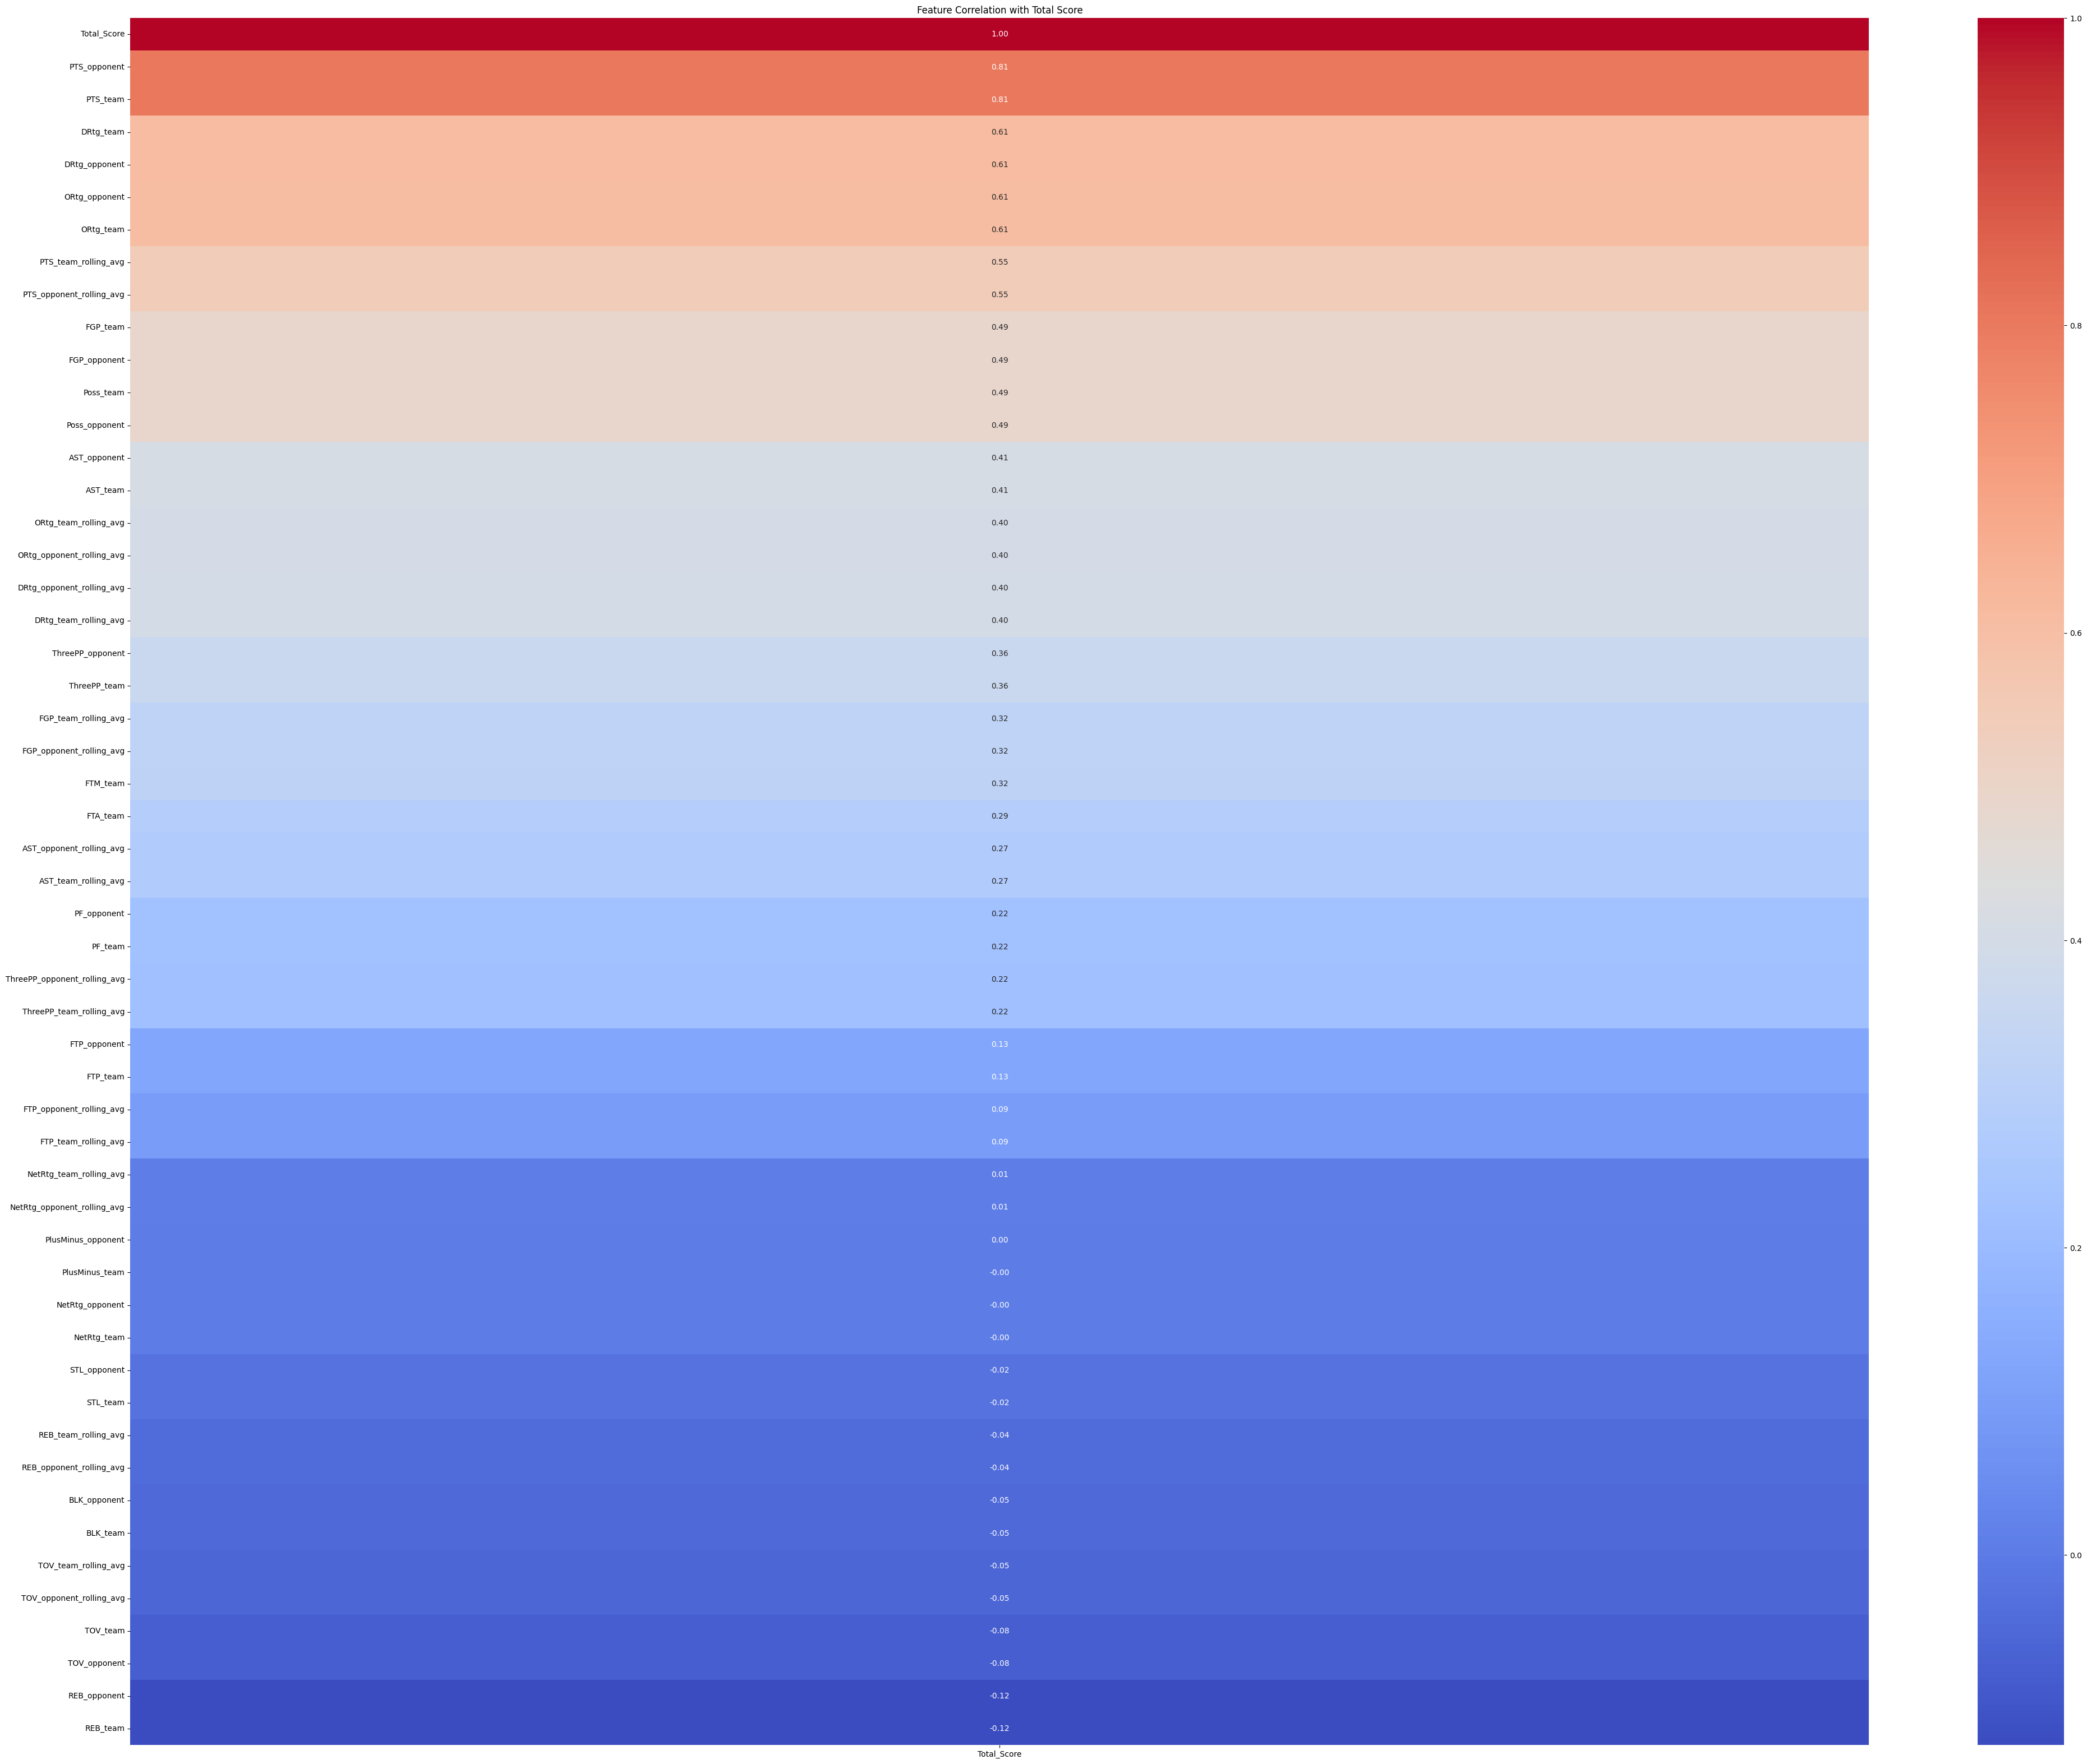

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#one hot encoding
nba_data = pd.get_dummies(nba_data, columns=['Team', 'Opponent', 'Location'])

# Assuming you've determined a list of potential features including new engineered features
team_opponent_features = [
    "PTS_team", "PTS_team_rolling_avg", "FGP_team", "FGP_team_rolling_avg", "ThreePP_team", "ThreePP_team_rolling_avg",
    "FTM_team", "FTA_team", "FTP_team", "FTP_team_rolling_avg", "REB_team", "REB_team_rolling_avg",
    "AST_team", "AST_team_rolling_avg", "STL_team", "BLK_team", "TOV_team", "TOV_team_rolling_avg", "PF_team", "PlusMinus_team",
    "ORtg_team", "ORtg_team_rolling_avg", "DRtg_team", "DRtg_team_rolling_avg", "NetRtg_team", "NetRtg_team_rolling_avg", "Poss_team",
    "PTS_opponent", "PTS_opponent_rolling_avg", "FGP_opponent", "FGP_opponent_rolling_avg", "ThreePP_opponent", "ThreePP_opponent_rolling_avg",
    "FTP_opponent", "FTP_opponent_rolling_avg", "REB_opponent", "REB_opponent_rolling_avg", "AST_opponent", "AST_opponent_rolling_avg",
    "STL_opponent", "BLK_opponent", "TOV_opponent", "TOV_opponent_rolling_avg", "PF_opponent", "PlusMinus_opponent", "ORtg_opponent",
    "ORtg_opponent_rolling_avg", "DRtg_opponent", "DRtg_opponent_rolling_avg", "NetRtg_opponent", "NetRtg_opponent_rolling_avg", "Poss_opponent",
]

df = pd.DataFrame(nba_data[team_opponent_features], columns=team_opponent_features)

df['Total_Score'] = nba_data['Total_Score']

# Compute the correlation matrix
correlation_matrix = df.corr()
high_corr_features = correlation_matrix['Total_Score'].sort_values(key=abs, ascending=False)

# Plotting the correlation with Total_Score
plt.figure(figsize=(50, 40))
sns.heatmap(correlation_matrix[['Total_Score']].sort_values(by='Total_Score', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Total Score')

high_corr_team_features = correlation_matrix.index[abs(correlation_matrix['Total_Score']) > 0.2].tolist()

# Print the highly correlated features
print(high_corr_team_features)




['Player_1_PTS', 'Player_1_PTS_rolling_avg', 'Player_1_FGP', 'Player_1_FGP_rolling_avg', 'Player_1_ThreePP', 'Player_1_AST', 'Player_1_AST_rolling_avg', 'Player_1_FP', 'Player_1_FP_rolling_avg', 'Player_1_uPER', 'Player_1_uPER_rolling_avg', 'Player_2_PTS', 'Player_2_PTS_rolling_avg', 'Player_2_FGP', 'Player_2_ThreePP', 'Player_2_AST', 'Player_2_FP', 'Player_2_FP_rolling_avg', 'Player_2_uPER', 'Player_2_uPER_rolling_avg', 'Player_3_PTS', 'Player_3_PTS_rolling_avg', 'Player_3_FGP', 'Player_3_ThreePP', 'Player_3_FP', 'Player_3_FP_rolling_avg', 'Player_3_uPER', 'Player_3_uPER_rolling_avg', 'Player_4_PTS', 'Player_4_PTS_rolling_avg', 'Player_4_FGP', 'Player_4_FP', 'Player_4_uPER', 'Player_4_uPER_rolling_avg', 'Player_5_PTS', 'Player_5_PTS_rolling_avg', 'Player_5_FGP', 'Player_5_FGP_rolling_avg', 'Player_5_FP', 'Player_5_uPER', 'Player_5_uPER_rolling_avg', 'Player_6_PTS', 'Player_6_PTS_rolling_avg', 'Player_6_FGP', 'Player_6_FGP_rolling_avg', 'Player_6_uPER', 'Player_6_uPER_rolling_avg', 'To

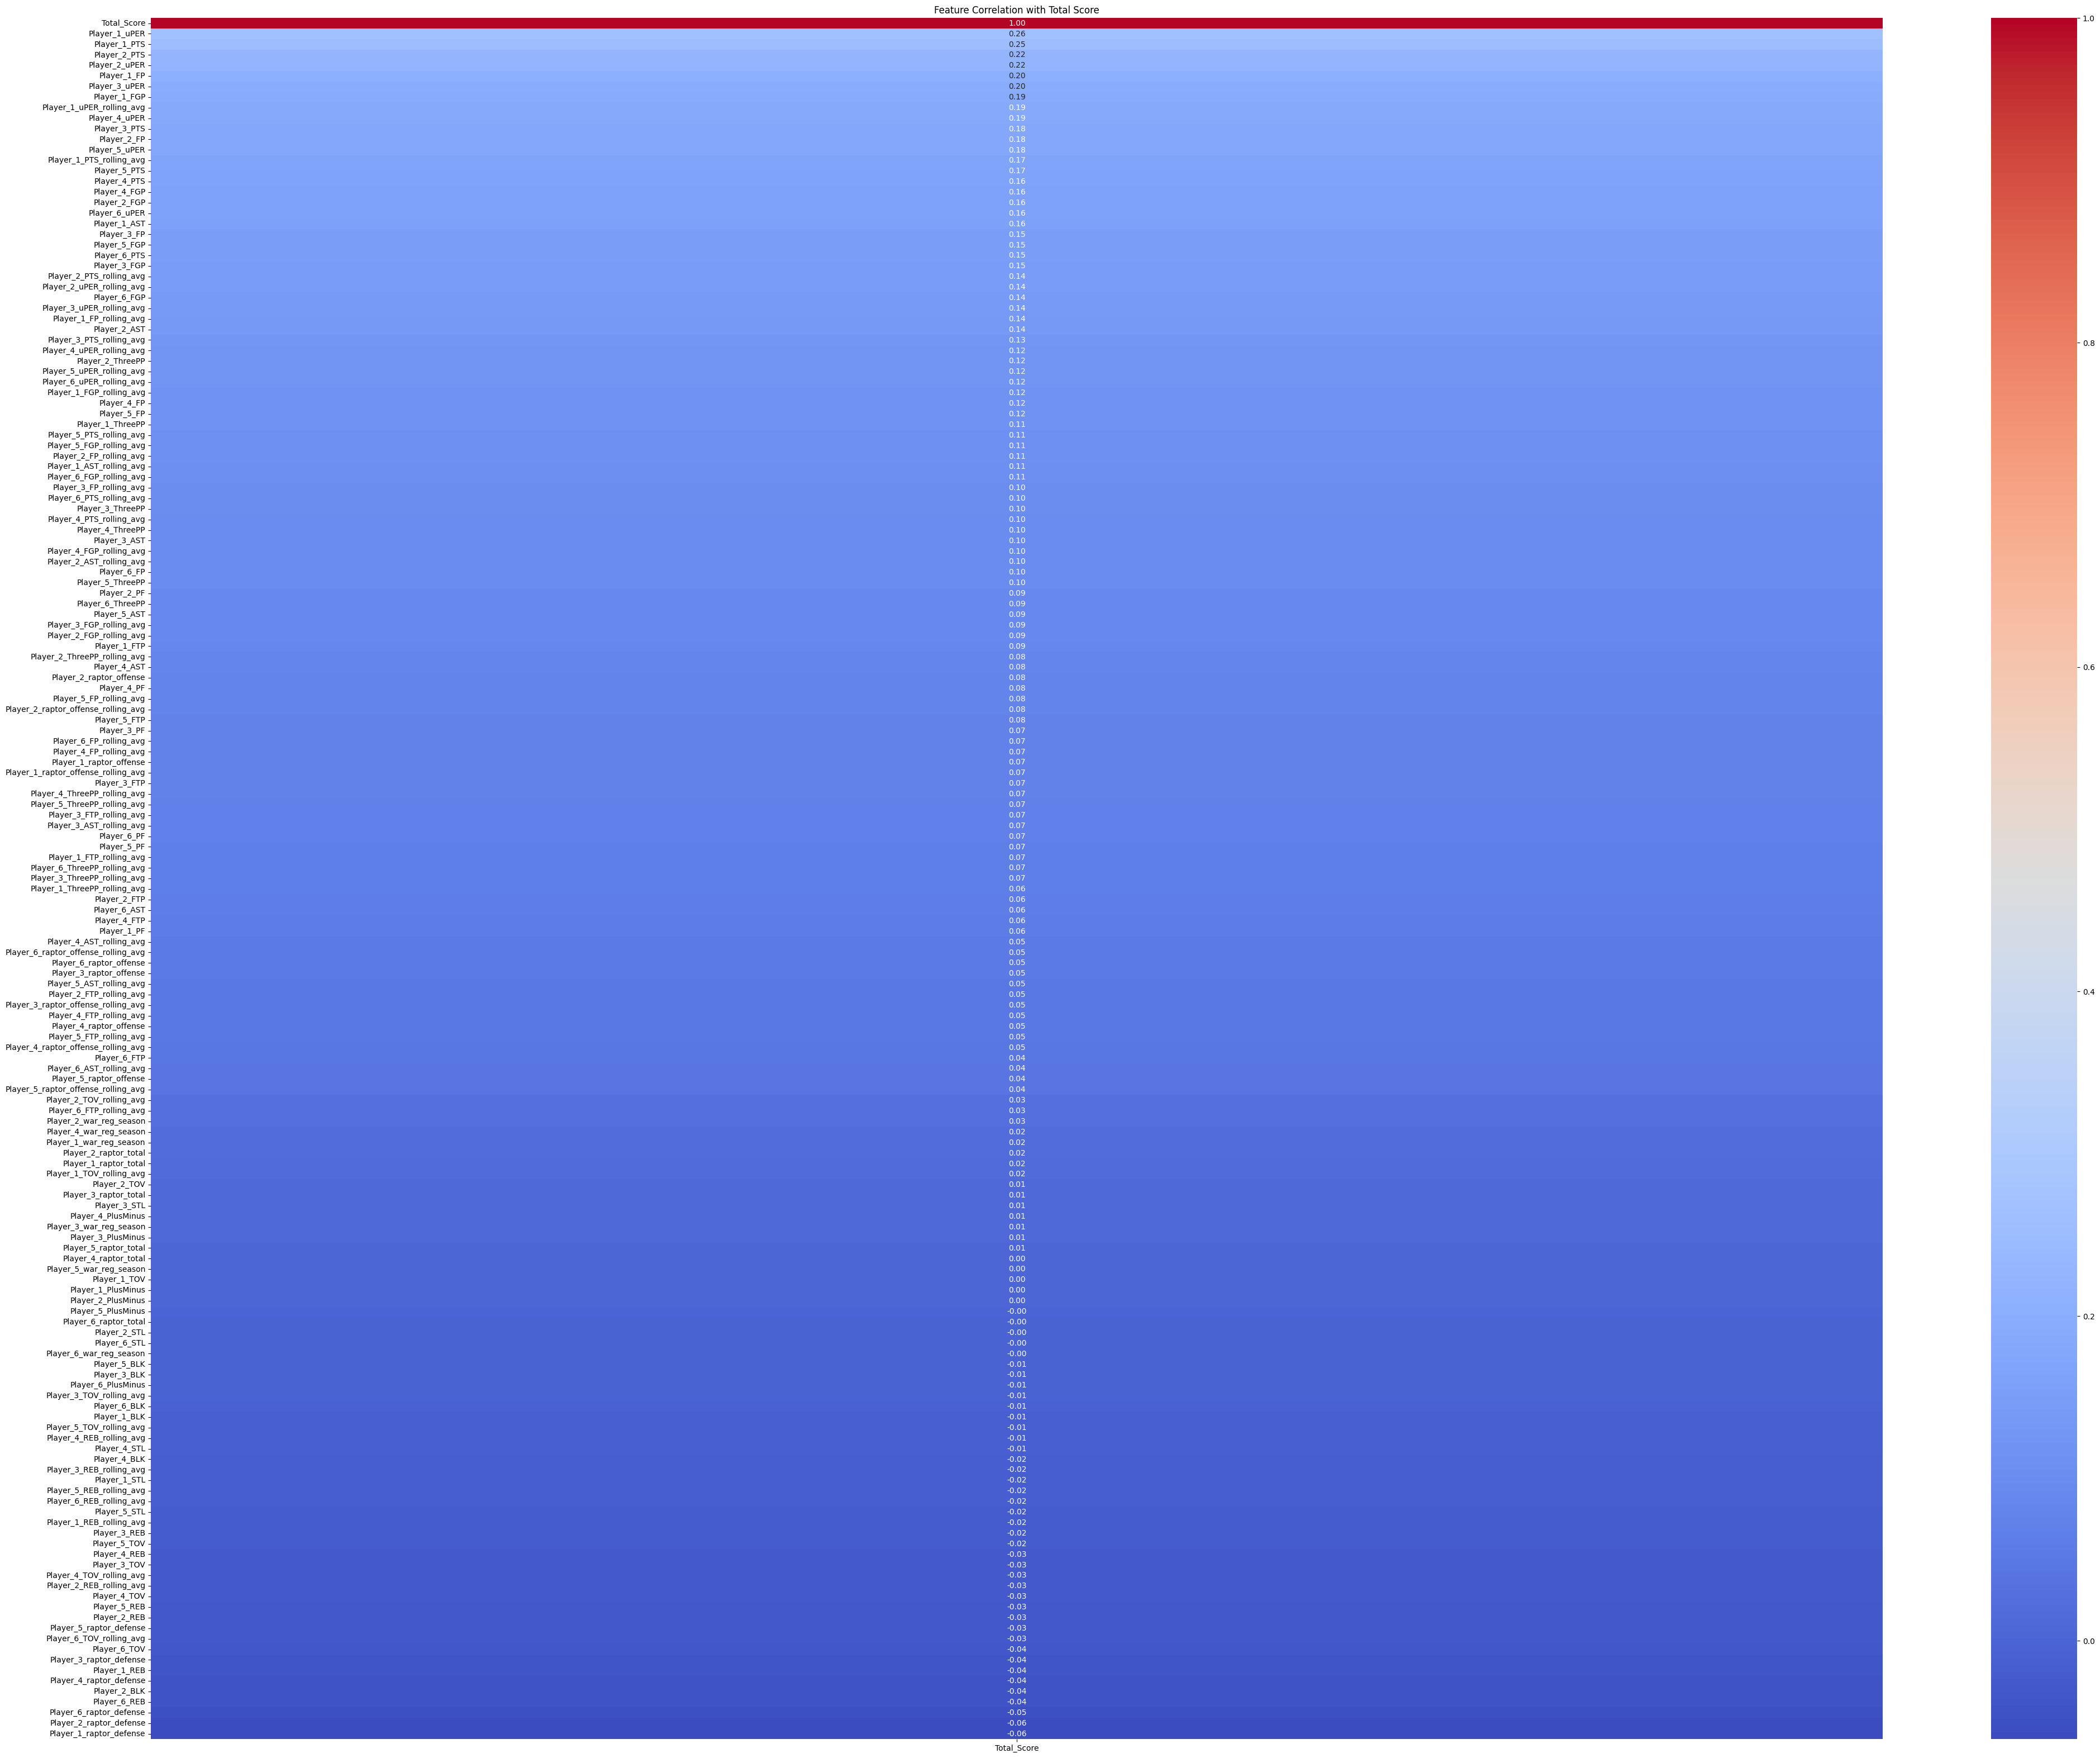

In [15]:
# Base player features for one player
base_player_features = [
    "PTS", "PTS_rolling_avg", "FGP", "FGP_rolling_avg",
    "ThreePP", "ThreePP_rolling_avg", "FTP", "FTP_rolling_avg",
    "REB", "REB_rolling_avg", "AST", "AST_rolling_avg",
    "STL", "BLK", "TOV", "TOV_rolling_avg",
    "PF", "PlusMinus", "FP", "FP_rolling_avg",
    "uPER", "uPER_rolling_avg", "raptor_offense", "raptor_offense_rolling_avg",
    "raptor_defense", "raptor_total", "war_reg_season"
]

# Generate features for all players
all_player_features = []
for i in range(1, 7):  # For players 1 to 6
    player_features = [f"Player_{i}_{feature}" for feature in base_player_features]
    all_player_features.extend(player_features)

# df_encoded = pd.get_dummies(df, columns=['Team', 'Opponent', 'Location'])  # Assuming 'Team' and 'Opponent' are categorical
# df_encoded = df_encoded[columns_to_keep]  # Fix: Use df_encoded instead of df

#scale the player features
#df[all_player_features] = scaler.fit_transform(df[all_player_features])


player_df = pd.DataFrame(nba_data[all_player_features], columns=all_player_features)

player_df['Total_Score'] = nba_data['Total_Score']

# Compute the correlation matrix
correlation_matrix = player_df.corr()
high_corr_features = correlation_matrix['Total_Score'].sort_values(key=abs, ascending=False)

# Plotting the correlation with Total_Score
plt.figure(figsize=(50, 40))
sns.heatmap(correlation_matrix[['Total_Score']].sort_values(by='Total_Score', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Total Score')

high_corr_player_features = correlation_matrix.index[abs(correlation_matrix['Total_Score']) > 0.1].tolist()

# Print the highly correlated features
print(high_corr_player_features)

In [16]:
#get the following features, but only for player 1 from the high_corr_player_features list
player_1_features = [feature for feature in high_corr_player_features if 'Player_1' in feature]
#take out the 'Player_1_' part of the feature names
iso_player_features = [feature.replace('Player_1_', '') for feature in player_1_features]

#primt length of player_features
print(len(iso_player_features))

#get all player features, from players 1-6
six_player_features = []
for i in range(1, 7):  # For players 1 to 6
    player_features = [f"Player_{i}_{feature}" for feature in iso_player_features]
    six_player_features.extend(player_features)


all_features = high_corr_team_features + six_player_features
print(all_features)
print(len(all_features))
#get the type of all_features
print(type(all_features))
all_features.remove('Total_Score')

11
['PTS_team', 'PTS_team_rolling_avg', 'FGP_team', 'FGP_team_rolling_avg', 'ThreePP_team', 'ThreePP_team_rolling_avg', 'FTM_team', 'FTA_team', 'AST_team', 'AST_team_rolling_avg', 'PF_team', 'ORtg_team', 'ORtg_team_rolling_avg', 'DRtg_team', 'DRtg_team_rolling_avg', 'Poss_team', 'PTS_opponent', 'PTS_opponent_rolling_avg', 'FGP_opponent', 'FGP_opponent_rolling_avg', 'ThreePP_opponent', 'ThreePP_opponent_rolling_avg', 'AST_opponent', 'AST_opponent_rolling_avg', 'PF_opponent', 'ORtg_opponent', 'ORtg_opponent_rolling_avg', 'DRtg_opponent', 'DRtg_opponent_rolling_avg', 'Poss_opponent', 'Total_Score', 'Player_1_PTS', 'Player_1_PTS_rolling_avg', 'Player_1_FGP', 'Player_1_FGP_rolling_avg', 'Player_1_ThreePP', 'Player_1_AST', 'Player_1_AST_rolling_avg', 'Player_1_FP', 'Player_1_FP_rolling_avg', 'Player_1_uPER', 'Player_1_uPER_rolling_avg', 'Player_2_PTS', 'Player_2_PTS_rolling_avg', 'Player_2_FGP', 'Player_2_FGP_rolling_avg', 'Player_2_ThreePP', 'Player_2_AST', 'Player_2_AST_rolling_avg', 'Play

In [6]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # Initialize the scaler and PCA
# scaler = StandardScaler()
# pca = PCA(n_components=0.95)


# # Scale the data
# X_train_scaled = scaler.fit_transform(train_data[all_features])
# X_val_scaled = scaler.transform(val_data[all_features])
# X_test_scaled = scaler.transform(test_data[all_features])

# # Apply PCA
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_val_pca = pca.transform(X_val_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [7]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
def build_log2_model(input_dim):
    model = Sequential()
    neurons = input_dim
    # Adding layers with L1 and L2 regularization
    while neurons > 4:  # Minimum layer size
        model.add(Dense(neurons, activation='relu', kernel_initializer='he_normal',
                        kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))  # Adjust regularization rates as needed
        model.add(Dropout(0.3))
        neurons //= 2
    
    # Output layer
    model.add(Dense(1, activation='linear'))  # Linear activation for regression
    return model

def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure the returned value is a float
    else:
        # Use `np.exp` which handles floating-point operations well and explicitly cast to float
        return float(lr * np.exp(-0.1))


2024-05-05 01:37:33.313695: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare data and split
features = team_opponent_features + all_player_features
X = np.array(nba_data[features])
y = nba_data['Total_Score'].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)

    model = build_log2_model(X_train_pca.shape[1])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='huber', metrics=['mean_absolute_error'])
    lr_scheduler = LearningRateScheduler(scheduler)

    model.fit(X_train_pca, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[lr_scheduler], validation_data=(X_val_pca, y_val))

    # Prediction and accuracy calculation
    y_pred = model.predict(X_val_pca)
    adjusted_close_val = nba_data.iloc[val_index]['Adjusted_Close'].values
    predicted_over_under = (y_pred.flatten() > adjusted_close_val).astype(int)
    actual_over_under = (y_val > adjusted_close_val).astype(int)
    accuracy = np.mean(predicted_over_under == actual_over_under)
    accuracy_scores.append(accuracy)

    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)

print(f'Average MAE: {np.mean(mae_scores)}')
print(f'Average Over/Under Prediction Accuracy: {np.mean(accuracy_scores)}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MAE: 27.759179619256862
Average Over/Under Prediction Accuracy: 0.5487745646970994


In [8]:
# # Calculate the input dimension from PCA
# input_dim = X_train_pca.shape[1]
# model = build_log2_model(input_dim)
# optimizer = Adam(learning_rate=0.001)  # Starting learning rate
# model.compile(optimizer=optimizer, loss='huber', metrics=['mean_absolute_error'])

# lr_scheduler = LearningRateScheduler(scheduler)

# # Fit the model
# history = model.fit(
#     X_train_pca, 
#     train_data['Total_Score'],
#     validation_data=(X_val_pca, val_data['Total_Score']),
#     epochs=100,
#     batch_size=32,
#     verbose=1,
#     callbacks=[lr_scheduler]


# test_loss, test_mae = model.evaluate(X_test_pca, test_data['Total_Score'])
# print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')
# )


# # Predict total scores
# predicted_scores = model.predict(X_test_pca)

# # Prepare the data
# predicted_scores_df = pd.DataFrame(predicted_scores, columns=['Predicted_Total_Score'])
# test_data_reset = test_data.reset_index(drop=True)
# combined_predictions = pd.concat([test_data_reset, predicted_scores_df], axis=1)

# print(test_data['Adjusted_Close'])

# # Determine over/under predictions
# combined_predictions['predicted_over_under'] = (combined_predictions['Predicted_Total_Score'] > combined_predictions['Adjusted_Close']).astype(int)
# # Assuming 'Actual_Over_Under' is available
# # Calculate actual over/under
# combined_predictions['Actual_Over_Under'] = (combined_predictions['Total_Score'] > combined_predictions['Adjusted_Close']).astype(int)

# # Now calculate accuracy
# accuracy = (combined_predictions['predicted_over_under'] == combined_predictions['Actual_Over_Under']).mean()

# print(f"Accuracy of Over/Under Predictions: {accuracy:.2f}")



Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 179.0859 - mean_absolute_error: 170.3042 - val_loss: 57.3965 - val_mean_absolute_error: 48.3858 - learning_rate: 0.0010
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 100.9607 - mean_absolute_error: 92.0537 - val_loss: 57.8942 - val_mean_absolute_error: 49.3117 - learning_rate: 0.0010
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 95.8700 - mean_absolute_error: 87.3775 - val_loss: 44.6842 - val_mean_absolute_error: 36.4450 - learning_rate: 0.0010
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 88.7007 - mean_absolute_error: 80.5498 - val_loss: 42.3718 - val_mean_absolute_error: 34.4393 - learning_rate: 0.0010
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 88.0533 - mean_absolute_error: 80.1981 - val_loss: 43.1394 - val_mean_absolute_error: 35.4964 - learning_rate: 0.0010
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85.7558 - mean_absolute_error: 78.1768 - 